In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import torch.optim as optim
from torch.optim.lr_scheduler import MultiStepLR

In [2]:
LOG_ROOT = 'tensorboard_logs'
USE_GPU = True  # Set to True if you have installed tensorflow for GPU

In [4]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


# Deep Learning for Vision

- Convolution Operation
- Pooling
- Convolutional Neural Networks
- One-Hot Networks
- Embeddings
- Transformers



## 1. Convolutional Neural Networks (CNNs)


Neural Networks vs Convolutional Neural Networks
In a typical neural network, each neuron in the input layer is connected to a neuron in the hidden layer. However, in a CNN, only a small region of input layer neurons connect to neurons in the hidden layer. These regions are referred to as local receptive fields, which is translated across an image to create a feature map from the input layer to the hidden layer neurons. To implement this process efficiently, convolution is applied.

In CNNs, the weights and bias values are the same for all hidden neurons in a given layer. This means that all hidden neurons are detecting the same feature such as an edge or a blob in different regions of the image. This makes the network tolerant to translation of objects in an image. For example, a network trained to recognize cats, will be able to do so, whenever the cat is in the image.

### Layers in CNNs
- Convolution Layer
- Activation Layer
- Pooling Layer
- Fully Connected Layer

### 1.1 Convolution Layer
In this layer, we convolve the input data using kernels.

        Kernel (or filter) is a small unit that is applied across input data through a sliding window. The depth of the filter is equal to input. For example, an  RGB image data requires a filter with depth of three, because it has three channels.

We calculate the percentage of the area of the filter $g$ that overlaps the input $f$ at a time $\tau$ overall time $t$ using the following formulation:

$$ (f ∗ g)(\tau) = \int_{-\infty}^{\infty}f(\tau).g(t-\tau)d\tau $$

Since $\tau < 0$ is meaningless and $\tau > t$ is the value of the function in the future which we do not know, we can introduce boundaries to the formulation, and it would give us the one-dimensional convolutional tensor:

$$ (f ∗ g)(\tau) = \int_{0}^{t}f(\tau).g(t-\tau)d\tau $$


Multidimensional tensors 

$ (I ∗ h)(x,y) = \int_{0}^{x}\int_{0}^{y}I(i,j).h(x-i, y-j)didj $ (slides the image over the kernel)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $=\int_{0}^{x}\int_{0}^{y}I(i,j).h(x-i, y-j)didj$ (slides the kernel over the image)

<br>


$O_w = I_w - h_w + 1 $

where
$O_w:$ Output width of the convolution layer \
$I_w:$ Image width \
$h_w:$ Filter width

Same applies to height.




## 1.2 Activation and Pooling
The activation step applies a transformation the the output of the neuron by using activation functions. Rectified Linear Unit, or ReLU, is a commonly used activation function. It takes the output of a neuron and maps it to the highest positive value. If the output is negative, the function maps it to zero.

Nonlinear activation functions for learning are used between subsequent activation layers. Linear functions do not necessarily help with learning because the input and the output behave the same way.

Pooling further transforms the output of the activation step and reduces the dimensionality of the featured map by condensing the output of small regions of neurons into a single output, which helps simplifying the following layers, and reduces the number of parameters that the model needs to learn.

Every hidden layer increases the complexity of the learned image features. For example, the first layer might learn how to detect edges, and the last layer might learn how to detect more complex shapes.

### 1.2.1 Activation Function

Activation functions are mathematical operations used for deciding if the input is important for prediction to determine the whether or not a neuron should be activated based on its input to the network. If an input is important, the function activates the neuron.

Types of Activation Functions
- Binary Step
- Linear Activation
- Nonlinear Activation



### 1.2.1.1 Binary Step Activation Function
This function uses a threshold value to determine whether or not a neuron should be activated. If the input is greater than the threshold, the neuron is activated and its output is passed on to the next hidden layer.

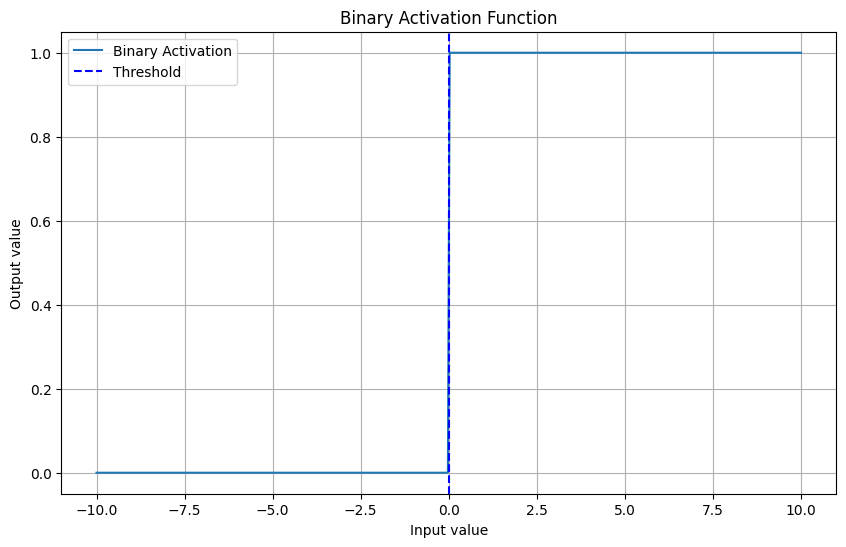

In [12]:
def binary_activation(x, threshold=0):
    """
    Demonstrative Binary activation function.
    
    Args:
    x (float or np.ndarray): Input value or array of input values.
    threshold (float): Threshold value for activation. Default is 0.
    
    Returns:
    int or np.ndarray: Binary output, either 0 or 1.
    """
    return np.where(x >= threshold, 1, 0)

def binary_activation_function(threshold=0):
    # Generate a range of input values
    x_values = np.linspace(-10, 10, 400)
    y_values = binary_activation(x_values)
    
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, label='Binary Activation')
    plt.axvline(x=threshold, color='b', linestyle='--', label='Threshold')
    plt.title('Binary Activation Function')
    plt.xlabel('Input value')
    plt.ylabel('Output value')
    plt.grid(True)
    plt.legend()
    plt.show()

# Demonstrate the binary activation function
binary_activation_function()


### 1.2.1.2 Linear Activation Function: 

Sometimes referred as "identity function", in this function the activation is directly proportional to the input. The function does not modify the weighted sum of the input and simply returns the value it was given. 

The two main issues with the linear activation function are, (i) the function is not fit for backpropagation because the derivative of the function is a constant with no relation to the input and this causes all layers of the neural network to collapse into one, (ii) no matter how many layers exist, the final layer is a linear function of the first layer which reduces the network into a single layer.

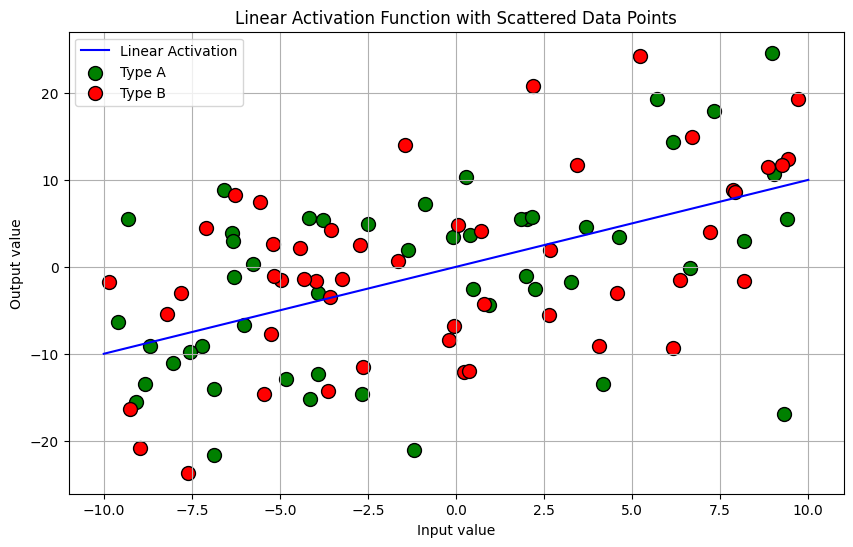

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def linear_activation_func(x):
    """
    Linear activation function.
    
    Args:
    x (float or np.ndarray): Input value or array of input values.
    
    Returns:
    float or np.ndarray: Linear output, which is the same as the input.
    """
    return x

def linear_activation_sample():
    # Generate a range of input values
    x_values = np.linspace(-10, 10, 400)
    # Apply the linear activation function
    y_values = linear_activation_func(x_values)
    
    # Generate random data points for two types of circles
    np.random.seed(42)  # For reproducibility
    x_data1 = np.random.uniform(-10, 10, 50)
    y_data1 = linear_activation_func(x_data1) + np.random.normal(0, 10, 50)
    
    x_data2 = np.random.uniform(-10, 10, 50)
    y_data2 = linear_activation_func(x_data2) + np.random.normal(0, 10, 50)
    

    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, label='Linear Activation', color='b')
    

    plt.scatter(x_data1, y_data1, label='Type A', color='g', marker='o', edgecolor='black', s=100)
    plt.scatter(x_data2, y_data2, label='Type B', color='r', marker='o', edgecolor='black', s=100)
    
    plt.title('Linear Activation Function with Scattered Data Points')
    plt.xlabel('Input value')
    plt.ylabel('Output value')
    plt.grid(True)
    plt.legend()
    plt.show()

# Demonstrate the linear activation function
linear_activation_sample()


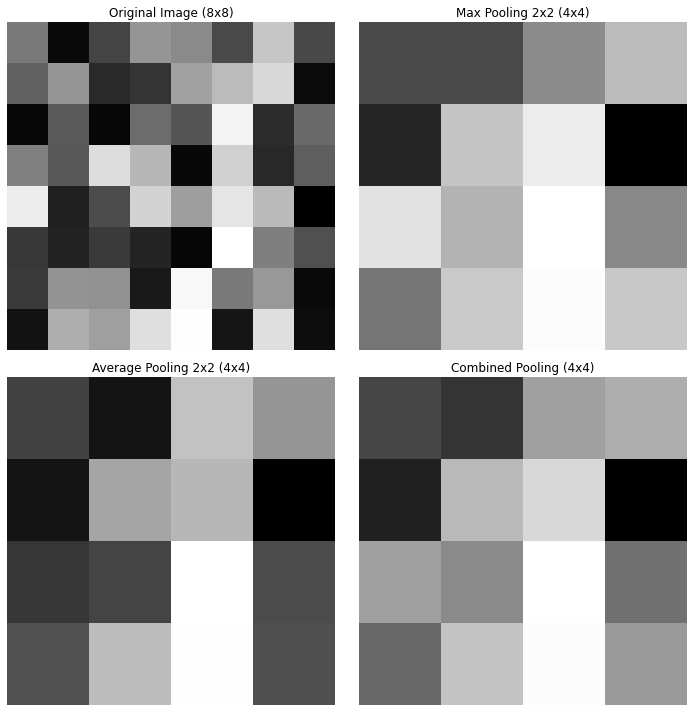

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
original_image = np.random.rand(8, 8)
axs[0, 0].imshow(original_image, cmap='gray')
axs[0, 0].set_title('Original Image (8x8)')
axs[0, 0].axis('off')

# Max Pooling 2x2
max_pooling_2x2 = np.array([[np.max(original_image[i:i+2, j:j+2]) 
                             for j in range(0, original_image.shape[1], 2)] 
                            for i in range(0, original_image.shape[0], 2)])
axs[0, 1].imshow(max_pooling_2x2, cmap='gray')
axs[0, 1].set_title('Max Pooling 2x2 (4x4)')
axs[0, 1].axis('off')

# Average Pooling 2x2
average_pooling_2x2 = np.array([[np.mean(original_image[i:i+2, j:j+2]) 
                                 for j in range(0, original_image.shape[1], 2)] 
                                for i in range(0, original_image.shape[0], 2)])
axs[1, 0].imshow(average_pooling_2x2, cmap='gray')
axs[1, 0].set_title('Average Pooling 2x2 (4x4)')
axs[1, 0].axis('off')

# Combined Pooling
combined_pooling = (max_pooling_2x2 + average_pooling_2x2) / 2
axs[1, 1].imshow(combined_pooling, cmap='gray')
axs[1, 1].set_title('Combined Pooling (4x4)')
axs[1, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [4]:
def max_pooling(input_matrix, pool_size):
    output_matrix = np.zeros((input_matrix.shape[0] // pool_size, input_matrix.shape[1] // pool_size))
    for i in range(0, input_matrix.shape[0], pool_size):
        for j in range(0, input_matrix.shape[1], pool_size):
            output_matrix[i // pool_size, j // pool_size] = np.max(input_matrix[i:i+pool_size, j:j+pool_size])
    return output_matrix

input_matrix = np.random.rand(8, 8)
pool_size = 2
max_pooled_output = max_pooling(input_matrix, pool_size)
print("Max Pooled Output:\n", max_pooled_output)

Max Pooled Output:
 [[0.98239764 0.50375969 0.78205992 0.88205636]
 [0.90859878 0.76827659 0.90980719 0.82259232]
 [0.81258651 0.91539445 0.38227556 0.78414621]
 [0.98427532 0.98507722 0.73316507 0.98540405]]


### 1.2.1.3 Sigmoid Activation Function

In Sigmoid Activation Function, also called the logistic function input to the function is transformed into a value between 0.0 and 1.0. Inputs that are much larger than 1.0 are transformed to the value 1.0, similarly, values much smaller than 0.0 are snapped to 0.0. The sigmoid function is given by:

$$\sigma(x) = \frac{1}{1+e^{-x}}$$


### 1.2.1.4 Tanh Activation Function

The hyperbolic tangent function, or tanh for short, is a nonlinear activation function that outputs values between -1.0 and 1.0.

A general problem with both the sigmoid and tanh functions is that they saturate. This means that large values snap to 1.0 and small values snap to -1 or 0 for tanh and sigmoid respectively. Further, the functions are only really sensitive to changes around their mid-point of their input, such as 0.5 for sigmoid and 0.0 for tanh. The tanh function is given by:

$$f(x) = 2\sigma(2x)-1$$
$$= \frac{e^x - e^{-x}}{e^x+e^{-x}}$$

### 1.2.1.5 Rectified Linear Unit (ReLU) Activation Function 

In order to use stochastic gradient descent with backpropagation of errors to train deep neural networks, an activation function is needed that looks and acts like a linear function, but is, in fact, a nonlinear function allowing complex relationships in the data to be learned.

The ReLU function is given by:

$$f(x) = max(0,x)$$


	if input > 0:
		return input
	else:
		return 0

	

Pseudo Code

	def rectified(x):
		return max(0.0, x)

	# Demonstrate with a positive input
	x = 1.0
	print('rectified(%.1f) is %.1f' % (x, rectified(x)))
	x = 1000.0
	print('rectified(%.1f) is %.1f' % (x, rectified(x)))
	
	# Demonstrate with a zero input
	x = 0.0
	print('rectified(%.1f) is %.1f' % (x, rectified(x)))

	# Demonstrate with a negative input
	x = -1.0
	print('rectified(%.1f) is %.1f' % (x, rectified(x)))
	x = -1000.0
	print('rectified(%.1f) is %.1f' % (x, rectified(x)))



The function is linear for values greater than zero, meaning it has a lot of the desirable properties of a linear activation function when training a neural network using backpropagation. Yet, it is a nonlinear function as negative values are always output as zero.


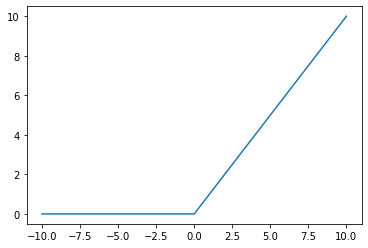

In [2]:
# plot inputs and outputs
from matplotlib import pyplot

# rectified linear function
def rectified(x):
	return max(0.0, x)

# define a series of inputs
series_in = [x for x in range(-10, 11)]
# calculate outputs for our inputs
series_out = [rectified(x) for x in series_in]
# line plot of raw inputs to rectified outputs
pyplot.plot(series_in, series_out)
pyplot.show()

The derivative of the activation function is required when updating the weights of a node as part of the backpropagation of error. The derivative of the function for negative values is 0.0 and for positive values is 1.0

### Pooling Layer

This layer downsamples the features in order to reduce the amount of parameters for the network to learn during training. Typically there are two hyperparameters introduced with pooling layer:

1. Dimension of Spatial Extend: The value of $N$ that we take in $N \times N$ representation and map to a single value
2. Stride: the amount of features that the filter skips

### Fully Connected Layer

This layer is used to learn nonlinear combination of features. While convolutional layers provide meaningful, low dimensional, invariant feature space; fully connected layers learn nonlinear function.


### Backpropagation
Short for "backward propagation of errors", it is a supervised algorithm used to minimize errors in predictions made by neural networks. The chain rule in calculus is applied: 
$$\frac{dx}{du}=\frac{du}{dy}\times \frac{dx}{dv}$$

$ [y = g(u) \land u = f(x)] \implies y = g(f(x)) $

## The Problem with CNNs

In the nature of convolution, knowing the value of an input helps predicting the value of another. For example in images, nearby pixels tend to have similar RGB values. The accuracy of CNNs reduces when the neighboring input features are not similar or related. However in text, depending on the changing context, neighboring values may not be always related.

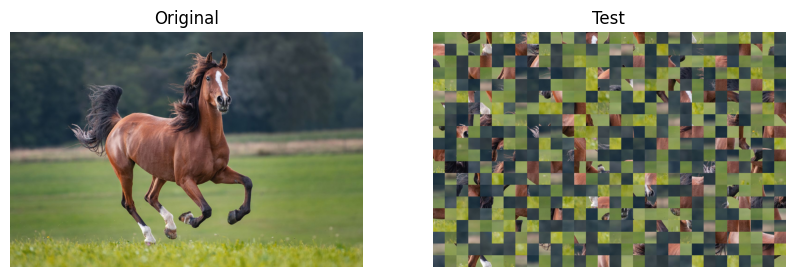

In [28]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def shuffle_pixels(image_array, pixel_size):
    height, width, channels = image_array.shape
    shuffled_image_array = np.zeros_like(image_array)
    
    # Calculate the number of pixels along height and width
    num_pixels_y = height // pixel_size
    num_pixels_x = width // pixel_size
    
    # Create a list of pixel indices
    pixel_indices = [(i, j) for i in range(num_pixels_y) for j in range(num_pixels_x)]
    
    # Shuffle the list of pixel indices
    np.random.shuffle(pixel_indices)
    
    for new_idx, (orig_y, orig_x) in enumerate(pixel_indices):
        new_y, new_x = divmod(new_idx, num_pixels_x)
        
        orig_pixel_y = orig_y * pixel_size
        orig_pixel_x = orig_x * pixel_size
        
        new_pixel_y = new_y * pixel_size
        new_pixel_x = new_x * pixel_size
        
        shuffled_image_array[new_pixel_y:new_pixel_y + pixel_size, new_pixel_x:new_pixel_x + pixel_size, :] = \
            image_array[orig_pixel_y:orig_pixel_y + pixel_size, orig_pixel_x:orig_pixel_x + pixel_size, :]
    
    return shuffled_image_array

image_path = 'Image Processing/img/pixelmanipulation.jpg'
image = Image.open(image_path)
image_array = np.array(image)
pixel_size = 50
shuffled_image_array = shuffle_pixels(image_array, pixel_size)
shuffled_image = Image.fromarray(shuffled_image_array.astype('uint8'))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(image)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Test')
plt.imshow(shuffled_image)
plt.axis('off')
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


c:\Users\lenih\Anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8635 - loss: 0.4874 - val_accuracy: 0.9803 - val_loss: 0.0651
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9804 - loss: 0.0647 - val_accuracy: 0.9832 - val_loss: 0.0561
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9877 - loss: 0.0395 - val_accuracy: 0.9867 - val_loss: 0.0427
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9906 - loss: 0.0303 - val_accuracy: 0.9918 - val_loss: 0.0321
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9935 - loss: 0.0215 - val_accuracy: 0.9905 - val_loss: 0.0355
Original Test Accuracy: 98.92%
Shuffled Test Accuracy: 13.59%


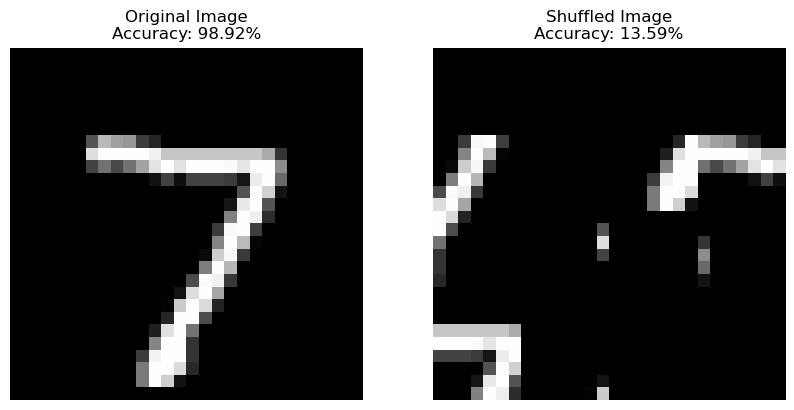

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

# Evaluate the model on the original test set
original_score = model.evaluate(x_test, y_test, verbose=0)
print(f'Original Test Accuracy: {original_score[1] * 100:.2f}%')

# Function to shuffle pixels
def shuffle_pixels(image_array, pixel_size):
    height, width, channels = image_array.shape
    shuffled_image_array = np.zeros_like(image_array)
    
    # Calculate the number of pixels along height and width
    num_pixels_y = height // pixel_size
    num_pixels_x = width // pixel_size
    
    # Create a list of pixel indices
    pixel_indices = [(i, j) for i in range(num_pixels_y) for j in range(num_pixels_x)]
    
    # Shuffle the list of pixel indices
    np.random.shuffle(pixel_indices)
    
    for new_idx, (orig_y, orig_x) in enumerate(pixel_indices):
        new_y, new_x = divmod(new_idx, num_pixels_x)
        
        orig_pixel_y = orig_y * pixel_size
        orig_pixel_x = orig_x * pixel_size
        
        new_pixel_y = new_y * pixel_size
        new_pixel_x = new_x * pixel_size
        
        shuffled_image_array[new_pixel_y:new_pixel_y + pixel_size, new_pixel_x:new_pixel_x + pixel_size, :] = \
            image_array[orig_pixel_y:orig_pixel_y + pixel_size, orig_pixel_x:orig_pixel_x + pixel_size, :]
    
    return shuffled_image_array

# Shuffle the test set
x_test_shuffled = np.array([shuffle_pixels(x.reshape(28, 28, 1), 7) for x in x_test])

# Evaluate the model on the shuffled test set
shuffled_score = model.evaluate(x_test_shuffled, y_test, verbose=0)
print(f'Shuffled Test Accuracy: {shuffled_score[1] * 100:.2f}%')

# Display a sample image and its shuffled version
sample_idx = 0
original_image = x_test[sample_idx].reshape(28, 28)
shuffled_image = x_test_shuffled[sample_idx].reshape(28, 28)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title(f'Original Image\nAccuracy: {original_score[1] * 100:.2f}%')
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Shuffled Image\nAccuracy: {shuffled_score[1] * 100:.2f}%')
plt.imshow(shuffled_image, cmap='gray')
plt.axis('off')

plt.show()


Another issue is CNNs can handle images well but struggle with non-numerical data such as text. The main difference between application of CNNs to images vs text is, the pixels in images are described by numbers which is needed as input in CNN applications to apply linear or nonlinear functions. One approach to train models on non-numerical data is a method called one-hot encoding.

## One-Hot Network

This method replaces each possible variable value with a unique vector. Each word in a language is made into a list, and each word is associated with its position in the list. The positions are converted into one-hot vectors which are essentially unit vectors for each positioning of the word. This means that, there are $0$ in every component of the vector except for the given position of the words which is represented with $1$.

&nbsp;

$$\begin{bmatrix}in \\ sat \\ the \\ cat \\ . \\ . \\ .\end{bmatrix} \rightarrow \begin{bmatrix} 0 \\ 1 \\ 2 \\ 3 \\ . \\ . \\ . \end{bmatrix} \rightarrow  \begin{bmatrix} 1&0&0&0&0&.&.&. \\ 0&1&0&0&0&.&.&. \\ 0&0&1&0&0&.&.&. \\ 0&0&0&1&0&.&.&. \\ .&.&.&.&. \\ .&.&.&.&. \\ .&.&.&.&. \end{bmatrix} $$

&nbsp;

So, whenever a word is used as an input to a neural network, it is actually the one-hot vector representation of that word. 


| the | cat | in | the | hat |
| --- | --- | --- | --- | --- |
|$\begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \\ . \\ . \\ . \end{bmatrix}$|$\begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \\ . \\ . \\ . \end{bmatrix}$|$\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \\ . \\ . \\ . \end{bmatrix}$|$\begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \\ . \\ . \\ . \end{bmatrix}$|$\begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ . \\ . \end{bmatrix}$|

## Embedding

Embedding is a method of representing non-numerical data like text, images and audio as points in a continuous vector space. With embedding, the locations of those points in space become semantically meaningful to machine learning algorithms.

Machine learning algorithms usually can only take low-dimensional numerical data as input as they apply linear or nonlinear functions to the input. Therefore, non-numerical data is converted into numerical format, such as converting images into pixel values, text data into mathematical representations, graph data into matrices. For example, OpenAI’s embedding implementation represents the relationships between words and categories instead of just analyzing each word in isolation. In this context, embeddings make it possible to generate coherent and relevant responses to user prompts.

Word2Vec is an embedding model developed by Google in 2013, and it uses two layer neural network to take a word as input, and output an n-dimensional coordinate as the embedding vector. This means that when these word vectors are plotted in a three dimensional space, synonyms cluster, and the semantic relationships and similarities between words are formed.

## Transformers

Main idea

- Concatenate / add a special positional encoding $p_j$ to each input vector $x_j$
- The encoding can be formulated as a function $pos: N \rightarrow R^d $ which transforms the position $j$ of the input into a $d$-dimensional vector $p_j = pos(j)$
- The function is designed with desired properties:
$$p(t) = \begin{bmatrix} \sin (\omega_1\cdot t) \\ \cos(\omega_1\cdot t) \\ sin(\omega_2 \cdot t) \\ cos(\omega_2 \cdot t) \\ . \\ . \\ . \\ sin(\omega_{d/2} \cdot t) \\ cos(\omega_{d/2} \cdot t)\end{bmatrix}$$


The first step of a transformer is to associate each word with a high dimensional vector, this is called an embedding. Possible embeddings can correspond with semantic meaning. Transformers adjust these embeddings so that they don't merely encode an individual word but instead they create contextual meaning.